<a href="https://colab.research.google.com/github/edwine-nyakundi/Analysisproject/blob/main/biodataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd


LOADING THE DATASET

In [ ]:
# Assuming the dataset is named BiomedicalData.xlsx
df = pd.read_excel("/content/BiomedicalData.xlsx")

# Display the first few rows of the dataframe
df.head()


,Age,Sex,HospitalNumber,ALT,CHOL,CR,TRIG,HospitalNum
0,14.0,m,a,13.0,3.4,65.0,0.89,1.0
1,18.0,m,a,80.0,5.7,64.0,1.94,1.0
2,17.0,m,a,17.0,4.0,61.0,1.30,1.0
3,15.0,m,a,0.0,0.0,66.0,0.00,1.0
4,15.0,m,a,19.0,5.4,63.0,1.80,1.0


Explore the data

             Age        ALT       CHOL         CR       TRIG  HospitalNum
count  99.000000  99.000000  99.000000  99.000000  99.000000    99.000000
mean   17.373737  17.747475   4.295354  61.151515   1.099192     2.595960
std     6.320659  17.303028   1.138225  12.622755   0.710333     1.133166
min    10.000000   0.000000   0.000000   3.000000   0.000000     1.000000
25%    13.000000   0.000000   3.400000  55.500000   0.300000     2.000000
50%    15.000000  15.000000   4.480000  61.000000   1.300000     3.000000
75%    19.000000  28.000000   5.120000  66.000000   1.650000     4.000000
max    39.000000  80.000000   6.700000  99.000000   2.230000     4.000000


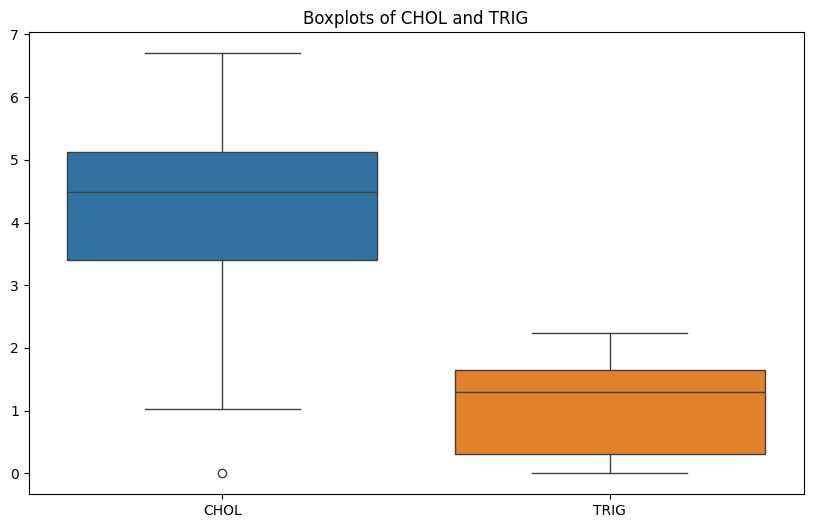

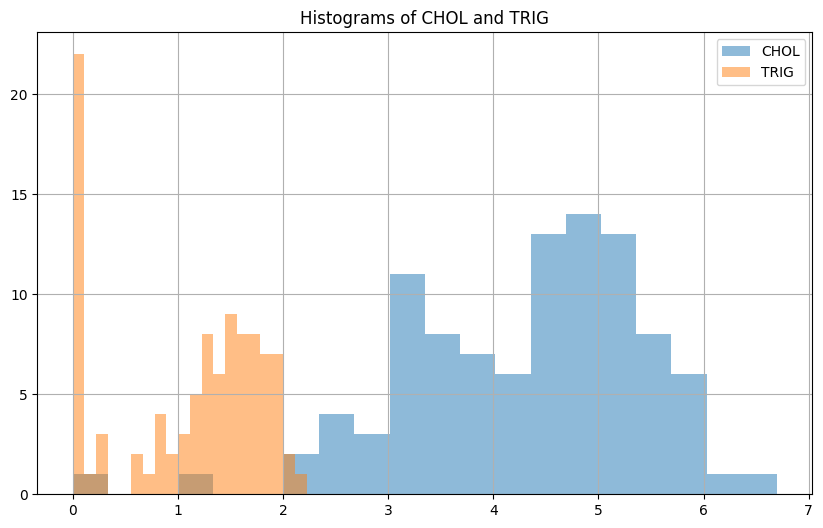

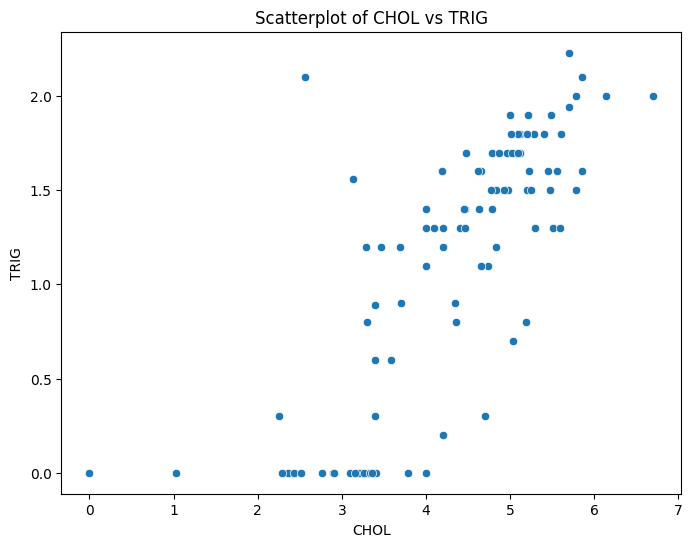

Correlation Coefficient between CHOL and TRIG: 0.7670672060263896


In [ ]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['CHOL', 'TRIG']])
plt.title('Boxplots of CHOL and TRIG')
plt.show()

# Histograms
plt.figure(figsize=(10, 6))
df['CHOL'].hist(alpha=0.5, label='CHOL', bins=20)
df['TRIG'].hist(alpha=0.5, label='TRIG', bins=20)
plt.title('Histograms of CHOL and TRIG')
plt.legend()
plt.show()

# Drop rows with missing values
df_clean = df.dropna(subset=['CHOL', 'TRIG'])

# Scatterplot and correlation coefficient
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CHOL', y='TRIG', data=df_clean)
plt.title('Scatterplot of CHOL vs TRIG')
plt.xlabel('CHOL')
plt.ylabel('TRIG')
plt.show()

corr_coeff, _ = pearsonr(df_clean['CHOL'], df_clean['TRIG'])
print('Correlation Coefficient between CHOL and TRIG:', corr_coeff)


Fit a linear regression model

In [ ]:
# Define the independent variable (CHOL) and dependent variable (TRIG)
X = df_clean['CHOL']
y = df_clean['TRIG']

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   TRIG   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     138.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.10e-20
Time:                        06:52:20   Log-Likelihood:                -62.172
No. Observations:                  99   AIC:                             128.3
Df Residuals:                      97   BIC:                             133.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9570      0.181     -5.300      0.0

Calculate confidence interval for the coefficient

In [ ]:
# Confidence interval for the coefficient
print(model.conf_int(alpha=0.05))


              0         1
const -1.315423 -0.598601
CHOL   0.398020  0.559389


Test the hypothesis

In [ ]:
# Test hypothesis: H0: β1 = 0, HA: β1 ≠ 0
print(model.t_test('CHOL = 0'))


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.4787      0.041     11.775      0.000       0.398       0.559


Plot regression line and prediction band

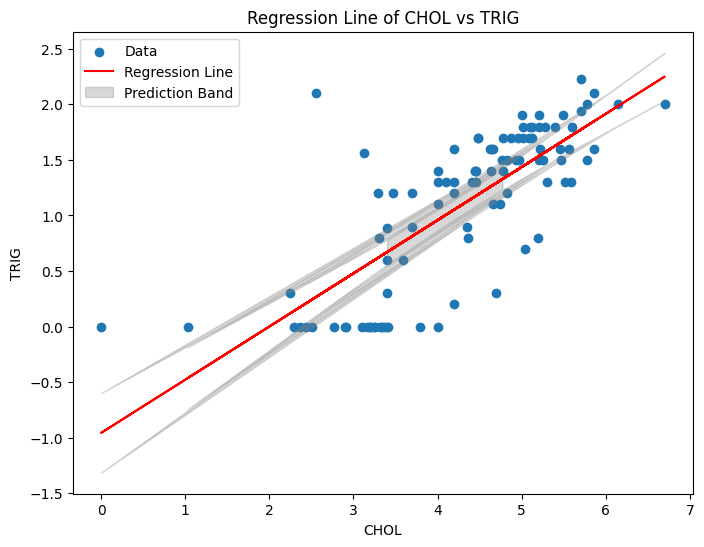

In [ ]:
# Scatterplot with regression line and prediction band
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['CHOL'], df_clean['TRIG'], label='Data')
plt.plot(df_clean['CHOL'], model.predict(), color='red', label='Regression Line')
plt.title('Regression Line of CHOL vs TRIG')
plt.xlabel('CHOL')
plt.ylabel('TRIG')
plt.legend()

# Calculate prediction band
pred_band = model.get_prediction(X).summary_frame(alpha=0.05)
plt.fill_between(df_clean['CHOL'], pred_band['mean_ci_lower'], pred_band['mean_ci_upper'], color='grey', alpha=0.3, label='Prediction Band')

plt.legend()
plt.show()


QUESTION 2:

Import necessary libraries and read the dataset:

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Read the dataset
df = pd.read_excel("/content/BiomedicalData.xlsx")


Drop rows with missing Cholesterol values:

In [ ]:
# Drop rows with missing Cholesterol values
df_clean = df.dropna(subset=['CHOL'])


In [ ]:
# Display column names
print(df_clean.columns)


Index(['Age', 'Sex', 'HospitalNumber', 'ALT', 'CHOL', 'CR', 'TRIG',
       'HospitalNum'],
      dtype='object')


Perform one-way ANOVA:

In [ ]:
# One-way ANOVA
# Fit the ANOVA model
anova_model = ols('CHOL ~ C(HospitalNumber)', data=df_clean).fit()

# Perform ANOVA
anova_table = anova_lm(anova_model)
print("ANOVA Table:")
print(anova_table)


ANOVA Table:
                     df      sum_sq   mean_sq         F    PR(>F)
C(HospitalNumber)   3.0   13.474970  4.491657  3.759884  0.013377
Residual           95.0  113.489493  1.194626       NaN       NaN


Perform post-hoc test (Tukey's HSD):

In [ ]:
# Post-hoc test (Tukey's HSD)
posthoc = pairwise_tukeyhsd(df_clean['CHOL'], df_clean['HospitalNumber'], alpha=0.05)
print("\nPost-hoc Test (Tukey's HSD):")
print(posthoc)



Post-hoc Test (Tukey's HSD):
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     a      b   0.3371 0.7094  -0.488 1.1623  False
     a      c   0.1325   0.98 -0.7605 1.0255  False
     a      d   0.9347 0.0175  0.1214 1.7479   True
     b      c  -0.2046 0.9189 -1.0415 0.6322  False
     b      d   0.5975 0.1669 -0.1535 1.3486  False
     c      d   0.8022 0.0599 -0.0229 1.6273  False
---------------------------------------------------
